## Install and import


In [28]:
from brian2 import *
import pickle
from scipy.signal import savgol_filter
from matplotlib.pyplot import figure
from matplotlib.pyplot import cm

#%matplotlib widget
#%matplotlib


## Functions and parameters

In [29]:
def draw_spikes(file_name, plot_id, render_start, render_duration, y_lim, color_scheme):
  with open(file_name, 'rb') as m_f:
    m_mon = pickle.load(m_f)
    subplot(plot_id)
    plot(m_mon["t"]/second, m_mon['i'], color_scheme)
    xlim([render_start/second, render_duration/second])
    ylim([-0.5, y_lim])
    return True
  return False


In [31]:
step_duration = 1*second

cut_fibers_num = 100 ##24
muscle_fibers_num = 100 ##8
rg_num = 200 ## 48 # 200
motor_num = 200 ##48 # 200
V3_F_num = 100
bs_num = 100

total_save_seconds=60
# lad_path_prefix ='./out/2023-06-25-2l_stdp_InX_0/'
#load_path_prefix ='./out/2023-06-28-2l_stdp_Song_neuron/'
#load_path_prefix= './out/2023-06-29_2l_stdp_izhi/'
#load_path_prefix= './out/2023-06-29_2l_stdp_izhi_chattering/'
#load_path_prefix = './out/2023-07-04_stdp_cut_2/'
load_path_prefix = './out/long_run/'

dirs = list(range(60, total_save_seconds+60, 60))
file_name = 'cut2rg_weigts.pickle'
dirs

[60]

# Read and draw data

## Left leg

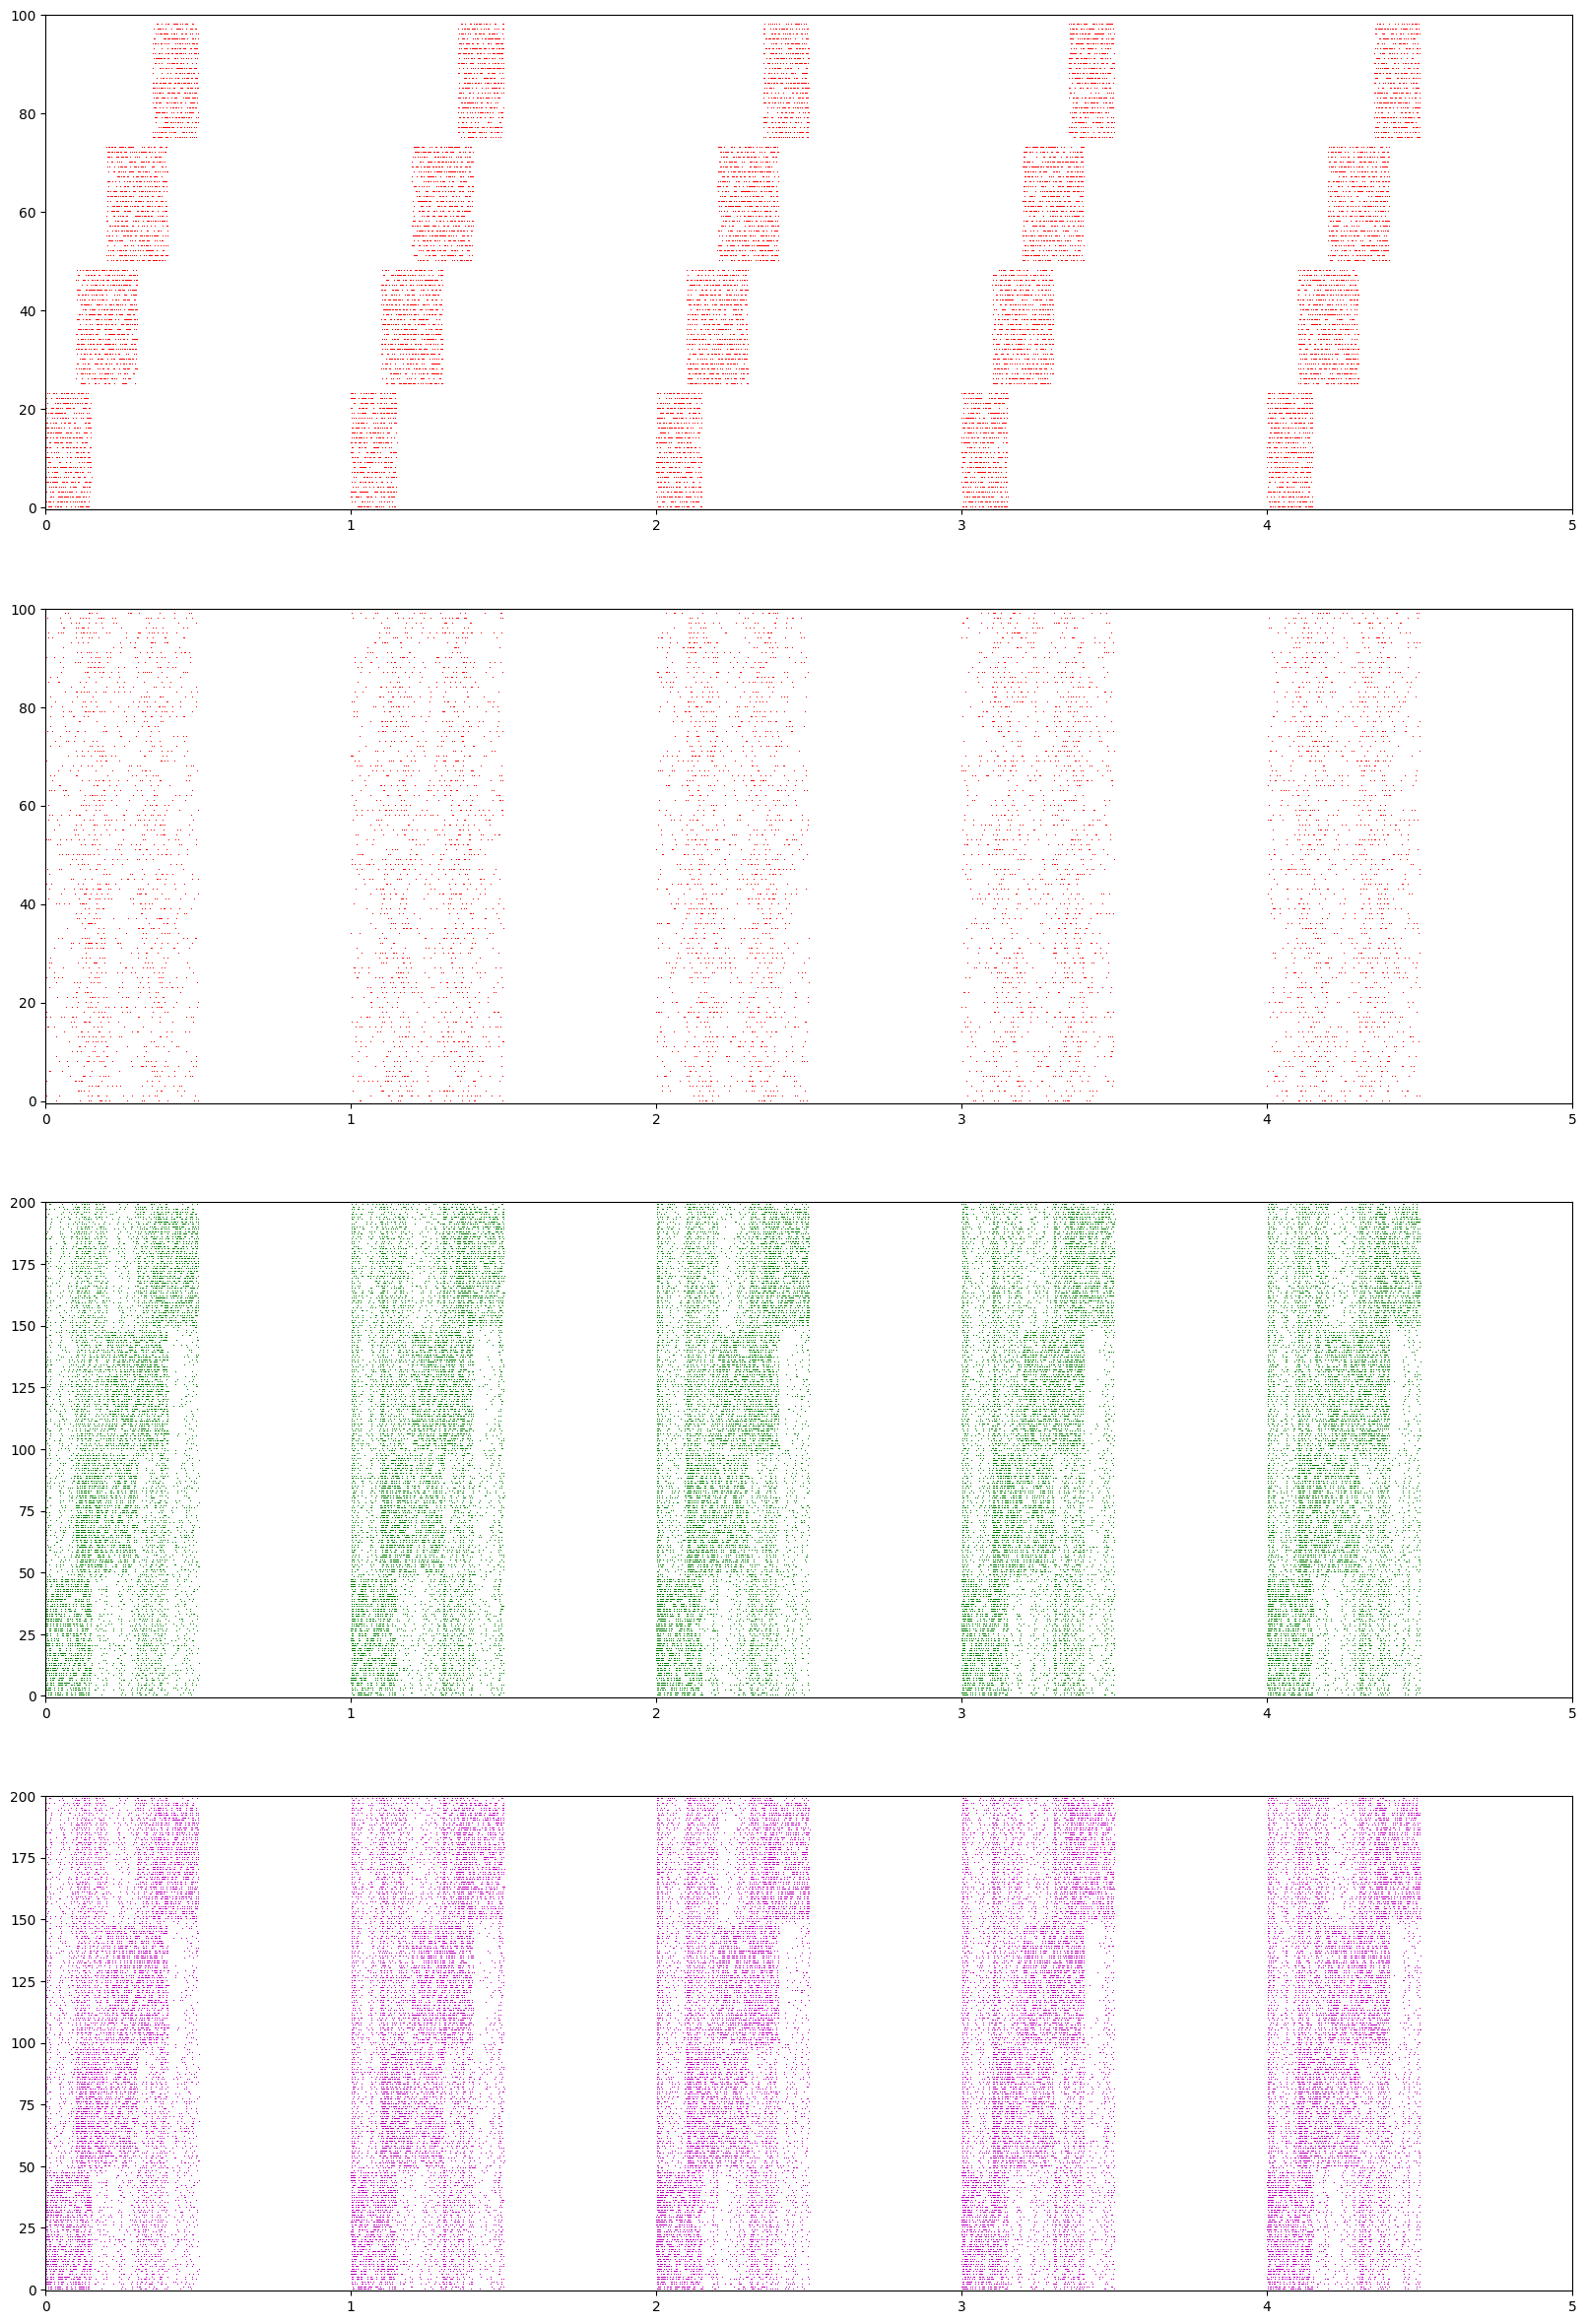

In [34]:
steps_num = 5
render_start = step_duration * 0.0 * ms
render_duration = (step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))

# Input singnals
figure(figsize=(20, 30))
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    c_file_name = 'l_e_cut_spikes.pickle'
    draw_spikes(load_path+c_file_name, 411, render_start, render_duration, cut_fibers_num, "r,")

for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    m_file_name = 'l_e_muscle_spikes.pickle'
    draw_spikes(load_path+m_file_name, 412, render_start, render_duration, muscle_fibers_num, "r,")
    
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    r_file_name = 'l_e_rg_neurons_spikes.pickle'
    draw_spikes(load_path+r_file_name, 413, render_start, render_duration, rg_num, "g,")

for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    motor_file_name = 'l_e_motor_neurons_spikes.pickle'
    draw_spikes(load_path+motor_file_name, 414, render_start, render_duration, motor_num, "m,")

show()

### Flexor

## Right leg

### Extensor

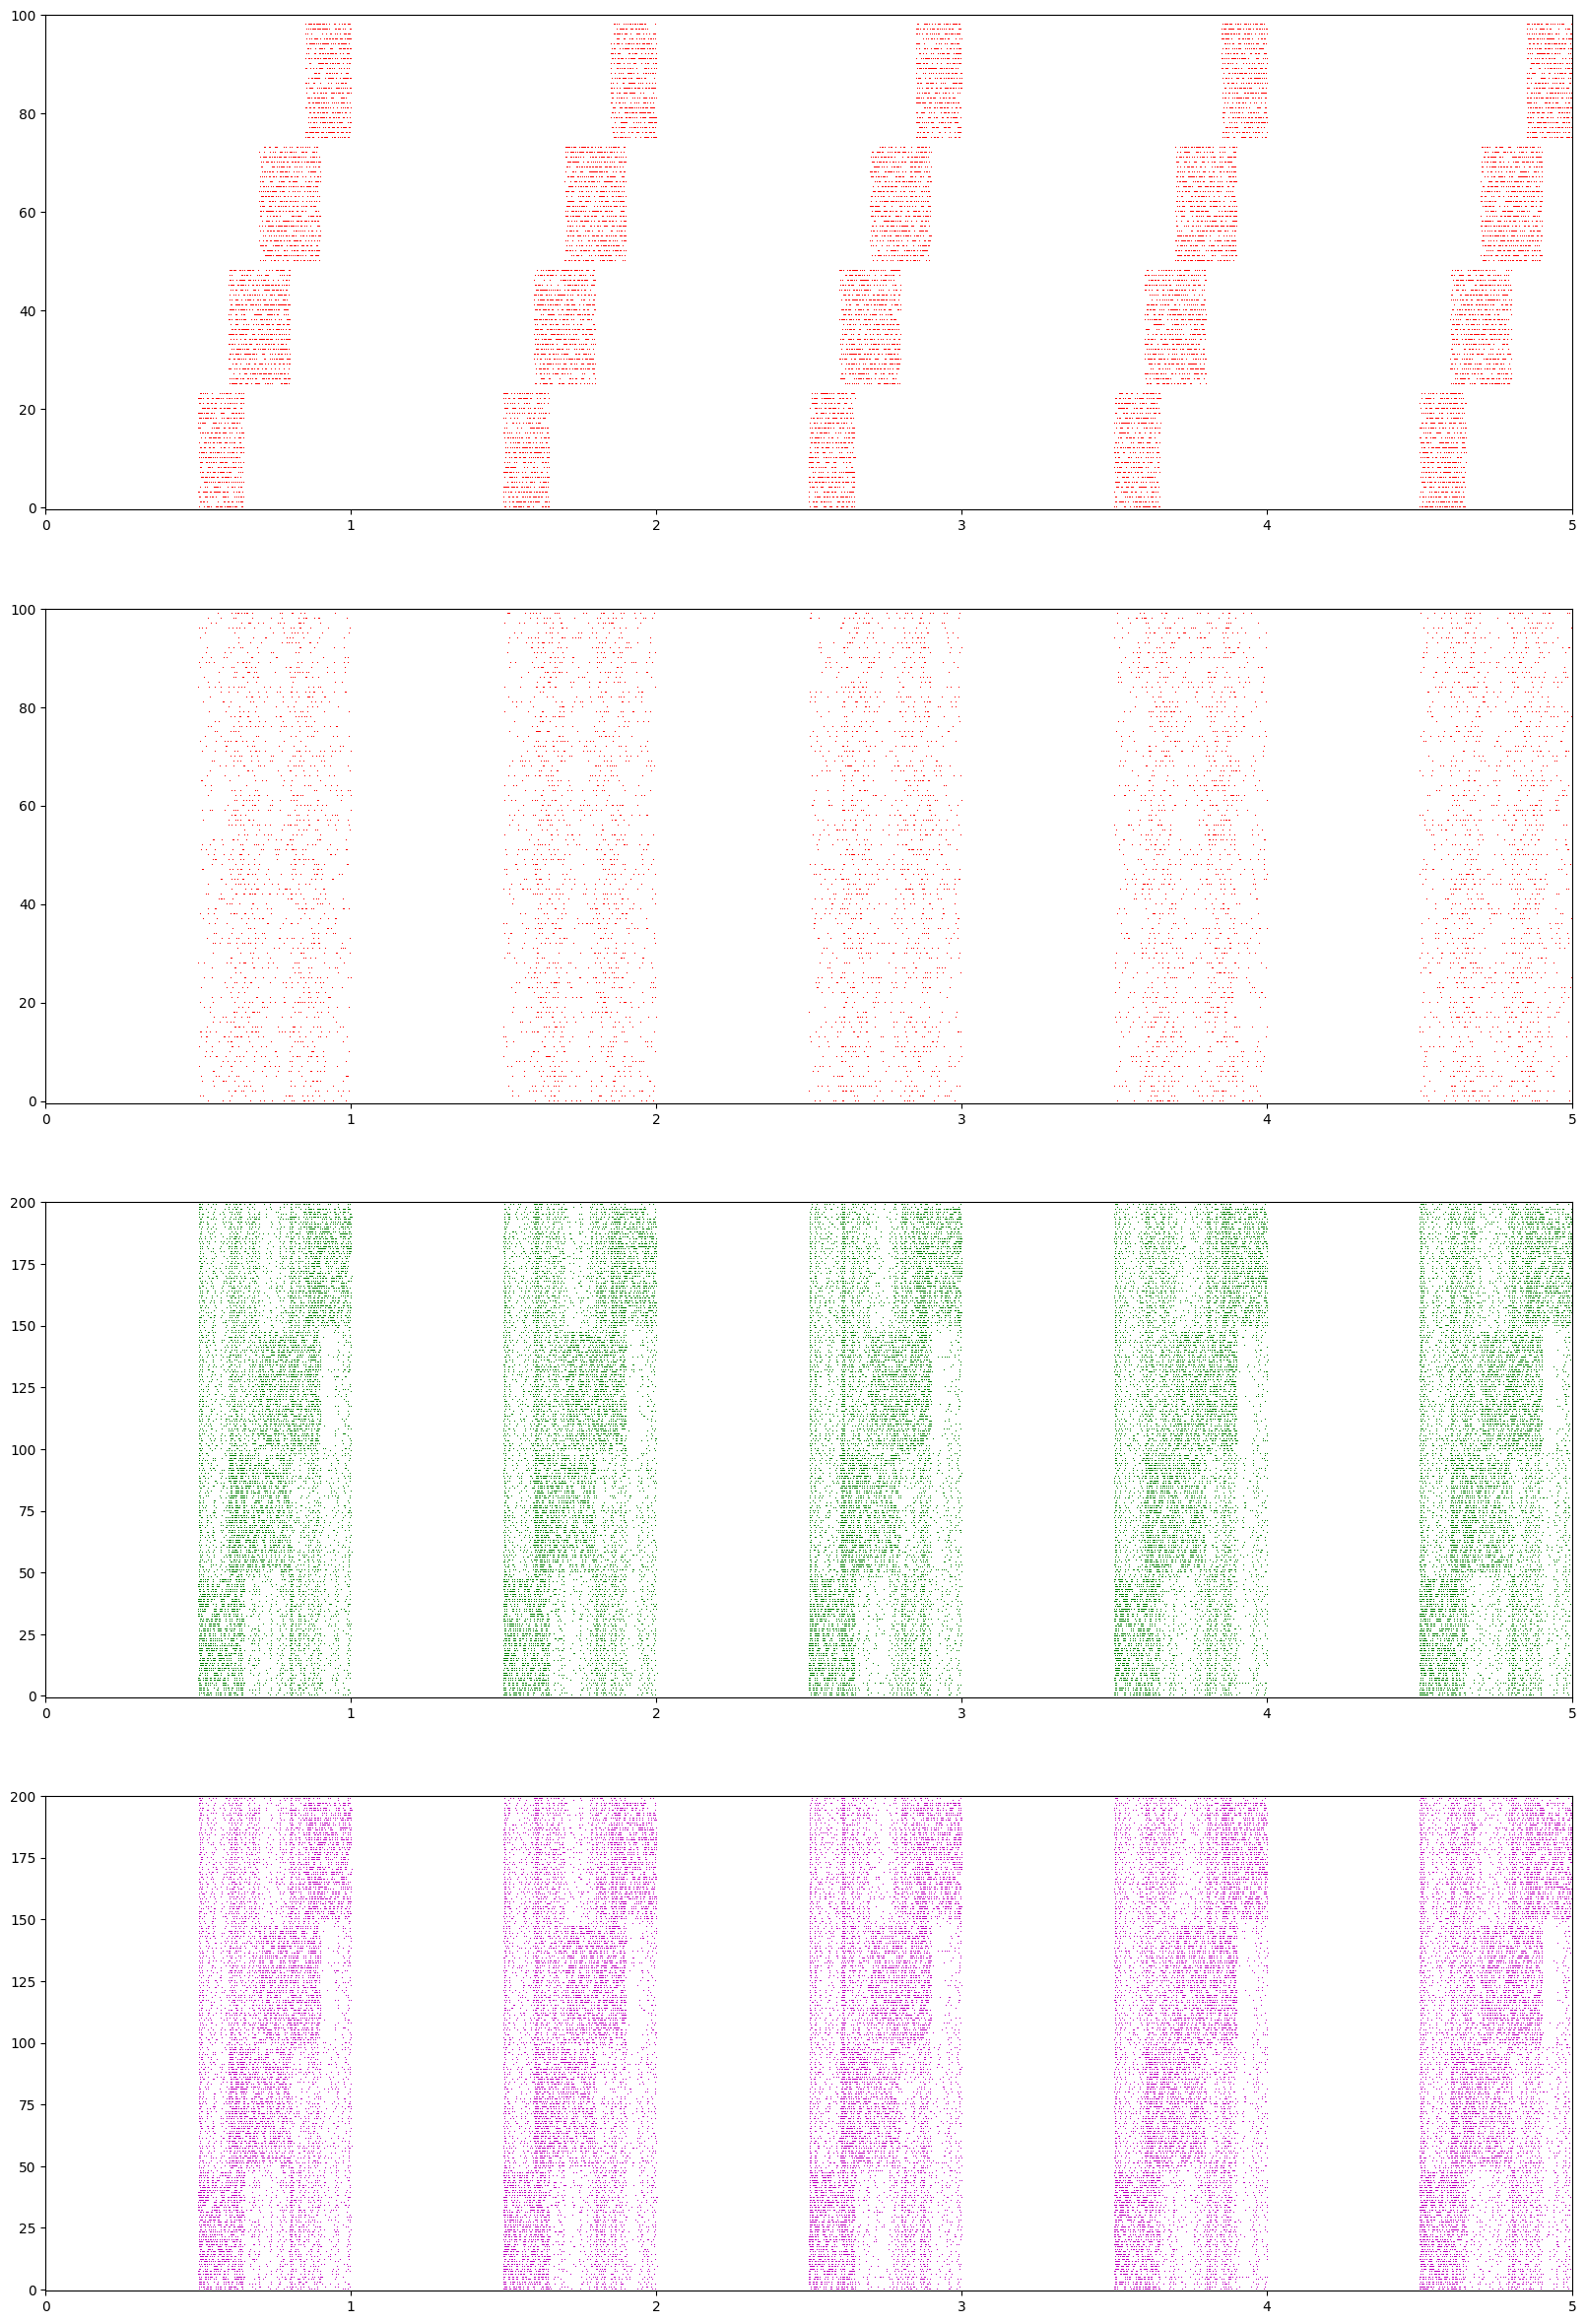

In [35]:
steps_num = 5
render_start = step_duration * 0.0 * ms
render_duration = (step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))

# Input singnals
figure(figsize=(20, 30))
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    c_file_name = 'r_e_cut_spikes.pickle'
    draw_spikes(load_path+c_file_name, 411, render_start, render_duration, cut_fibers_num, "r,")

for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    m_file_name = 'r_e_muscle_spikes.pickle'
    draw_spikes(load_path+m_file_name, 412, render_start, render_duration, muscle_fibers_num, "r,")
    
    
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    r_file_name = 'r_e_rg_neurons_spikes.pickle'
    draw_spikes(load_path+r_file_name, 413, render_start, render_duration, rg_num, "g,")

for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    motor_file_name = 'r_e_motor_neurons_spikes.pickle'
    draw_spikes(load_path+motor_file_name, 414, render_start, render_duration, motor_num, "m,")

show()

### Flexor

# Voltages

In [ ]:
## Uncomment if you want to make  the graphs interactive
#%matplotlib widget
#from google.colab import output
#output.enable_custom_widget_manager()

# Extensor motor neuron voltages
steps_num = 10
render_start = step_duration * 0.0 * ms
render_duration = (step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))

figure(figsize=(20, 10))
file_name = 'r_e_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        avg_motor = average(mon['v'], axis=1)
        smoothed_0_motor = savgol_filter(avg_motor, 31, 6)
        smoothed_1_motor = savgol_filter(avg_motor, 21, 6)
        
        subplot(411)
        plot(mon["t"]/second, mon['v'])
        xlim([render_start/second, render_duration/second])
        tight_layout()

        subplot(412)
        plot(mon['t']/second, avg_motor/mV)
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(413)
        plot(mon['t']/second, smoothed_1_motor/mV)
        xlim([render_start/second, render_duration/second])
        tight_layout()

show()


In [ ]:
## Uncomment if you want to make  the graphs interactive
#%matplotlib widget
#from google.colab import output
#output.enable_custom_widget_manager()

# Flexor motor neuron voltages
steps_num = 10
render_start = step_duration * 0.0 * ms
render_duration = (step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))

figure(figsize=(20, 10))
file_name = 'r_f_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        avg_motor = average(mon['v'], axis=1)
        smoothed_0_motor = savgol_filter(avg_motor, 31, 6)
        smoothed_1_motor = savgol_filter(avg_motor, 21, 6)
        
        subplot(411)
        plot(mon["t"]/second, mon['v'])
        xlim([render_start/second, render_duration/second])
        tight_layout()

        subplot(412)
        plot(mon['t']/second, avg_motor/mV)
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(413)
        plot(mon['t']/second, smoothed_1_motor/mV)
        xlim([render_start/second, render_duration/second])
        tight_layout()

show()


In [ ]:
## Draw sliced average extensor motor neuron voltages 
from matplotlib.pyplot import cm
steps_num = 1
render_start = step_duration * 0.0 * ms
render_step_duration = 500*ms
render_duration = (render_step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))
slicing_seconds = 1
number_of_slices = 60

figure(figsize=(20, 20))
file_name = 'r_e_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        
        points_num = len(mon['v'])
        points_in_slice = int(points_num / number_of_slices)
        print(points_in_slice)
        avg_motor = []
        smoothed_motor = []
        for i in range(0, number_of_slices):
            am = average(mon['v'][i*points_in_slice:(i+1)*points_in_slice], axis=1)
            avg_motor.append(am)
            smoothed_motor.append(savgol_filter(am, 21, 6))
        
        subplot(411)
        plot(mon["t"]/second, mon['v'])
        xlim([render_start/second, render_duration/second])
        tight_layout()

        color = iter(cm.rainbow(np.linspace(0, 1, 60)))
        subplot(412)
        for am in (avg_motor):
            c = next(color)
            plot(mon['t'][0:points_in_slice]/second, am/mV, alpha=0.5, c=c)
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        color = iter(cm.rainbow(np.linspace(0, 1, 60)))
        subplot(413)
        for s in (smoothed_motor):
            c = next(color)
            plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=c)
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        color = iter(cm.rainbow(np.linspace(1, 0, 60)))
        subplot(414)
        for si in range(len(smoothed_motor)-1,0,-1):
            #print(si)
            c = next(color)
            plot(mon['t'][0:points_in_slice]/second, smoothed_motor[si]/mV, alpha=0.8, c=c)
        xlim([render_start/second, render_duration/second])
        tight_layout()

show()


In [ ]:
## Draw sliced average flexor motor neuron voltages 
from matplotlib.pyplot import cm
steps_num = 1
render_start = step_duration * 600.0 * ms
render_step_duration = 1000*ms
render_duration = (render_step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))
slicing_seconds = 1
number_of_slices = 60

figure(figsize=(20, 20))
file_name = 'r_f_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        
        points_num = len(mon['v'])
        points_in_slice = int(points_num / number_of_slices)
        print(points_in_slice)
        avg_motor = []
        smoothed_motor = []
        for i in range(0, number_of_slices):
            am = average(mon['v'][i*points_in_slice:(i+1)*points_in_slice], axis=1)
            avg_motor.append(am)
            smoothed_motor.append(savgol_filter(am, 21, 6))
        
        subplot(411)
        plot(mon["t"]/second, mon['v'])
        xlim([render_start/second, render_duration/second])
        tight_layout()

        color = iter(cm.rainbow(np.linspace(0, 1, 60)))
        subplot(412)
        for am in (avg_motor):
            c = next(color)
            plot(mon['t'][0:points_in_slice]/second, am/mV, alpha=0.5, c=c)
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        color = iter(cm.rainbow(np.linspace(0, 1, 60)))
        subplot(413)
        for s in (smoothed_motor):
            c = next(color)
            plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=c)
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        color = iter(cm.rainbow(np.linspace(1, 0, 60)))
        subplot(414)
        for si in range(len(smoothed_motor)-1,0,-1):
            #print(si)
            c = next(color)
            plot(mon['t'][0:points_in_slice]/second, smoothed_motor[si]/mV, alpha=0.8, c=c)
        xlim([render_start/second, render_duration/second])
        tight_layout()

show()


In [ ]:
## 10 slices one by one 
## Extensor
steps_num = 1
render_start = step_duration * 10.0 * ms
render_step_duration = 500*ms
render_duration = (render_step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))
slicing_seconds = 1
number_of_slices = 60

figure(figsize=(20, 20))
file_name = 'r_e_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        
        points_num = len(mon['v'])
        points_in_slice = int(points_num / number_of_slices)
        print(points_in_slice)
        avg_motor = []
        smoothed_motor = []
        for i in range(0, number_of_slices):
            am = average(mon['v'][i*points_in_slice:(i+1)*points_in_slice], axis=1)
            avg_motor.append(am)
            smoothed_motor.append(savgol_filter(am, 21, 6))

        color = iter(cm.rainbow(np.linspace(0, 1, 7)))
        subplot(711)
        s=smoothed_motor[0]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(712)
        s=smoothed_motor[10]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(713)
        s=smoothed_motor[20]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(714)
        s=smoothed_motor[30]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(715)
        s=smoothed_motor[40]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(716)
        s=smoothed_motor[50]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(717)
        s=smoothed_motor[59]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        

In [ ]:
## 10 slices one by one 
## Extensor
steps_num = 1
render_start = step_duration * 600.0 * ms
render_step_duration = 1000*ms
render_duration = (render_step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))
slicing_seconds = 1
number_of_slices = 60

figure(figsize=(20, 20))
file_name = 'r_f_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        
        points_num = len(mon['v'])
        points_in_slice = int(points_num / number_of_slices)
        print(points_in_slice)
        avg_motor = []
        smoothed_motor = []
        for i in range(0, number_of_slices):
            am = average(mon['v'][i*points_in_slice:(i+1)*points_in_slice], axis=1)
            avg_motor.append(am)
            smoothed_motor.append(savgol_filter(am, 21, 6))

        color = iter(cm.rainbow(np.linspace(0, 1, 7)))
        subplot(711)
        s=smoothed_motor[0]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(712)
        s=smoothed_motor[10]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(713)
        s=smoothed_motor[20]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(714)
        s=smoothed_motor[30]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(715)
        s=smoothed_motor[40]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(716)
        s=smoothed_motor[50]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        
        subplot(717)
        s=smoothed_motor[59]
        plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.8, c=next(color))
        xlim([render_start/second, render_duration/second])
        tight_layout()
        

In [ ]:
## 10 slices in one picture 
## Extensor

steps_num = 1
render_start = step_duration * 10.0 * ms
render_step_duration = 500 * ms
render_duration = (render_step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))
slicing_seconds = 1
number_of_slices = 60

figure(figsize=(20, 20))
file_name = 'r_e_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        
        points_num = len(mon['v'])
        points_in_slice = int(points_num / number_of_slices)
        print(points_in_slice)
        avg_motor = []
        smoothed_motor = []
        for i in range(0, number_of_slices):
            am = average(mon['v'][i*points_in_slice:(i+1)*points_in_slice], axis=1)
            avg_motor.append(am)
            smoothed_motor.append(savgol_filter(am, 25, 6))

        color = iter(cm.rainbow(np.linspace(0, 1, 13)))
        subplot(711)
        for s in (smoothed_motor[::5]):
            plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.9, c=next(color))
            xlim([render_start/second, render_duration/second])
            tight_layout()

In [ ]:
## 10 slices in one picture 
## Flexor

steps_num = 1
render_start = step_duration * 510.0 * ms
render_step_duration = 990 * ms
render_duration = (render_step_duration*steps_num) * second
render_dirs = list(range(60, steps_num+60, 60))
slicing_seconds = 1
number_of_slices = 60

figure(figsize=(20, 20))
file_name = 'r_f_motor_neurons_voltages.pickle'
for d in render_dirs:
    load_path = load_path_prefix+str(d)+'/'
    with open(load_path + file_name, 'rb') as f:
        mon = pickle.load(f)
        
        points_num = len(mon['v'])
        points_in_slice = int(points_num / number_of_slices)
        print(points_in_slice)
        avg_motor = []
        smoothed_motor = []
        for i in range(0, number_of_slices):
            am = average(mon['v'][i*points_in_slice:(i+1)*points_in_slice], axis=1)
            avg_motor.append(am)
            smoothed_motor.append(savgol_filter(am, 25, 6))

        color = iter(cm.rainbow(np.linspace(0, 1, 13)))
        subplot(711)
        for s in (smoothed_motor[::5]):
            plot(mon['t'][0:points_in_slice]/second, s/mV, alpha=0.9, c=next(color))
            xlim([render_start/second, render_duration/second])
            tight_layout()

# Weights 

## Left leg

### Extensor

./out/long_run/60/


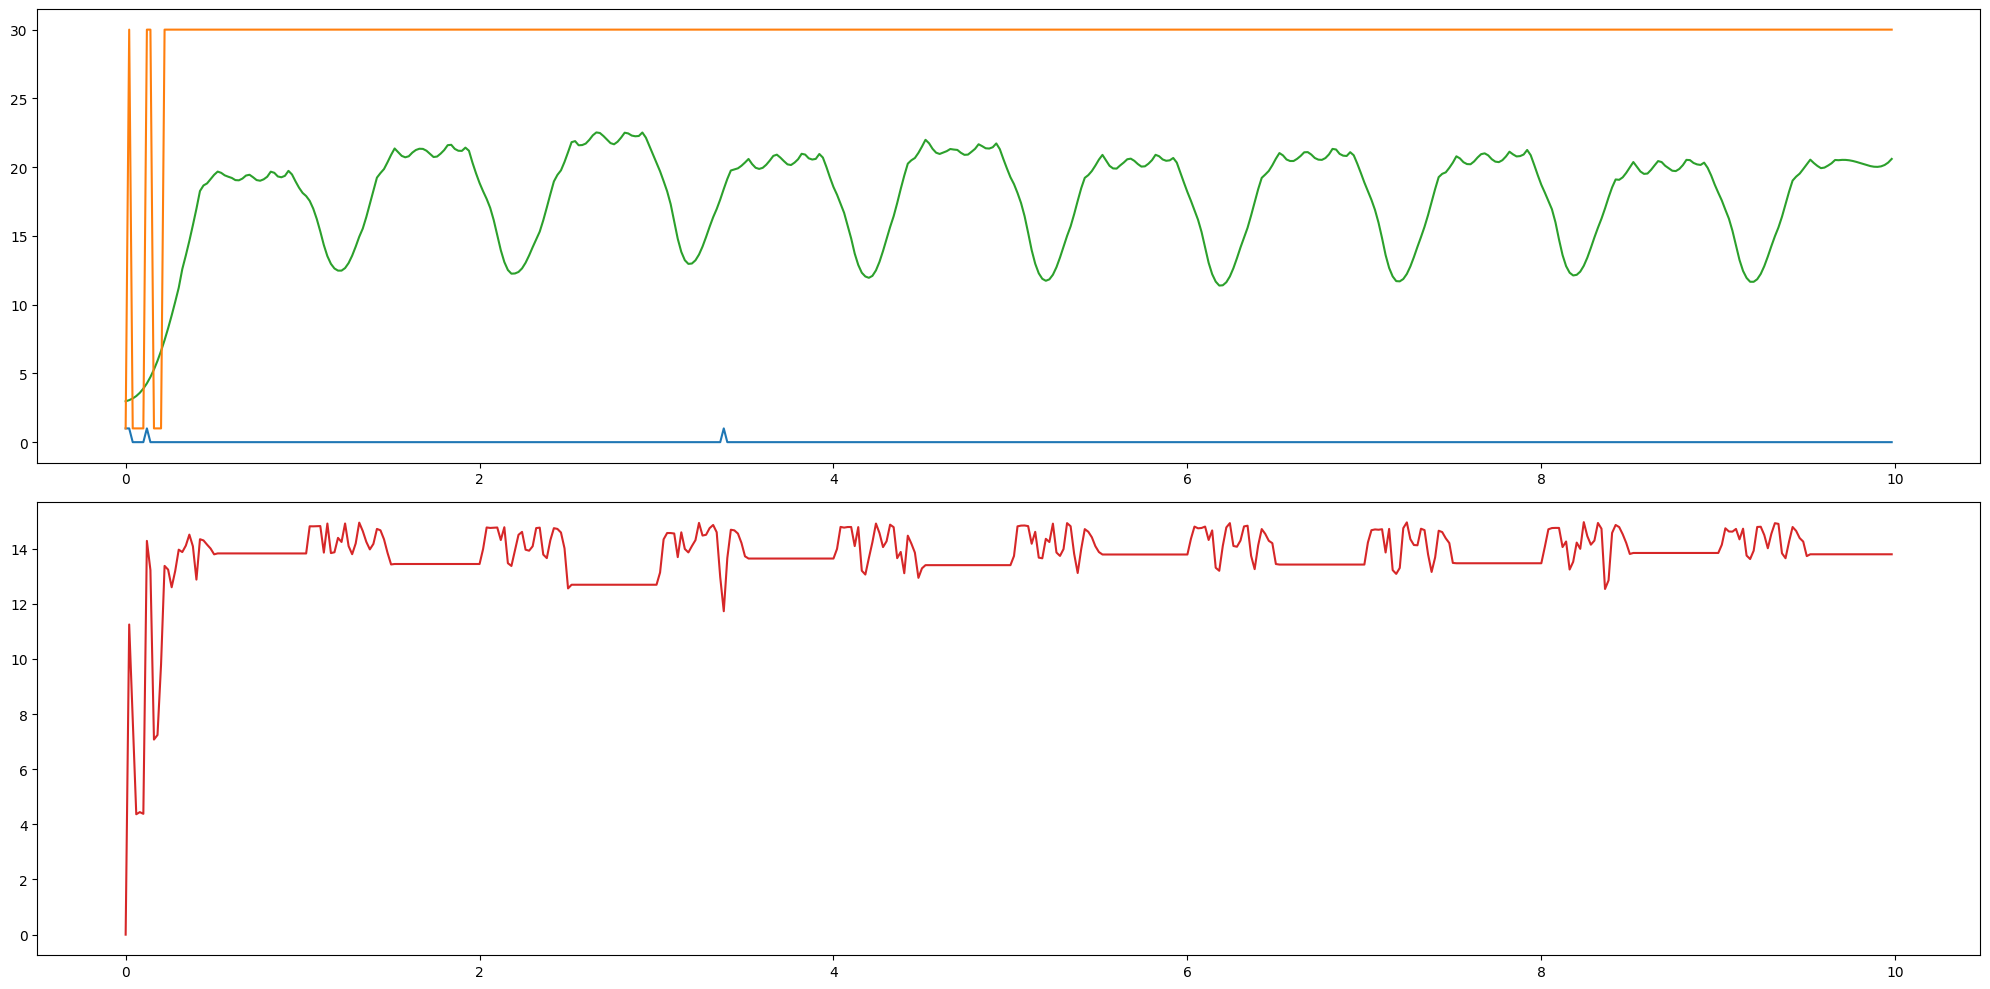

In [24]:
figure(figsize=(20, 10))
file_name = 'l_e_cut2rg_weigts.pickle'
file_rg2InE = 'l_e_rg2InE_weigts.pickle'
# 60
load_path_60 = load_path_prefix+str(dirs[0])+'/'
print (load_path_60)

with open(load_path_60 + file_name, 'rb') as f60:
    mon60 = pickle.load(f60)
    
    ## avg
    avg_w = average(mon60['s'], axis=1)
    smoothed_avg_w = savgol_filter(avg_w, 31, 4)
    max_w = percentile(mon60['s'], 15, axis=1)
    min_w = percentile(mon60['s'], 85, axis=1)
    var_w = std(mon60['s'], axis=1)
    smoothed_var_w = savgol_filter(var_w, 31, 4)
    
    ## avg
    subplot(211)
    plot(mon60['t']/second, smoothed_avg_w, 'tab:green')
    plot(mon60['t']/second, max_w, 'tab:blue')
    plot(mon60['t']/second, min_w, 'tab:orange')
    #xlim([render_start/second, render_duration/second])
    tight_layout()
    
    subplot(212)
    plot(mon60['t']/second, var_w, 'tab:red')
    #xlim([render_start/second, render_duration/second])
    tight_layout()
    
    
show()

### Flexor

In [ ]:
figure(figsize=(20, 10))
file_name = 'l_f_muscle2rg_weigts.pickle'
file_rg2InE = 'l_f_rg2InE_weigts.pickle'

# 60
load_path_60 = load_path_prefix+str(dirs[0])+'/'
print (load_path_60)

with open(load_path_60 + file_name, 'rb') as f60:
    mon60 = pickle.load(f60)
    #subplot(411)
    #plot(mon60["t"], mon60['s'])
    #xlim([render_start/second, render_duration/second])
    
    ## avg
    avg_w = average(mon60['s'], axis=1)
    smoothed_avg_w = savgol_filter(avg_w, 21, 4)
    max_w = percentile(mon60['s'], 15, axis=1)
    min_w = percentile(mon60['s'], 85, axis=1)
    var_w = std(mon60['s'], axis=1)
    smoothed_var_w = savgol_filter(var_w, 21, 4)
    
    ## avg
    subplot(511)
    plot(mon60['t']/second, smoothed_avg_w, 'tab:green')
    plot(mon60['t']/second, max_w, 'tab:blue')
    plot(mon60['t']/second, min_w, 'tab:orange')
    #xlim([render_start/second, render_duration/second])
    tight_layout()
    
    subplot(512)
    plot(mon60['t']/second, var_w, 'tab:red')
    #xlim([render_start/second, render_duration/second])
    tight_layout()
    
    with open(load_path_60 + file_rg2InE, 'rb') as frg2InE:
        rg2InE = pickle.load(frg2InE)
        
        avg_w_rg2InE = average(rg2InE['s'], axis=1)
        smoothed_avg_w_avg_w_rg2InE = savgol_filter(avg_w_rg2InE, 21, 4)
        max_w = percentile(rg2InE['s'], 15, axis=1)
        min_w = percentile(rg2InE['s'], 85, axis=1)
        ## avg
        subplot(513)
        plot(rg2InE['t']/second, smoothed_avg_w, 'tab:green')
        plot(rg2InE['t']/second, max_w, 'tab:blue')
        plot(rg2InE['t']/second, min_w, 'tab:orange')
        tight_layout()
    
show()

### F&E 

In [ ]:
## draw all combined weights 

figure(figsize=(20, 15))

## ALL wheights 
file_name_e='l_e_cut2rg_weigts.pickle'
file_name_f='l_f_muscle2rg_weigts.pickle'
file_rg2InE = 'l_e_rg2InE_weigts.pickle'
file_rg2InF = 'l_f_rg2InE_weigts.pickle'

print(file_name)
for d in dirs:
    load_path_60 = load_path_prefix+str(d)+'/'
    print (load_path_60)

    with open(load_path_60 + file_name_e, 'rb') as f60:
        mon60 = pickle.load(f60)
        ## avg
        avg_w = average(mon60['s'], axis=1)
        max_w = percentile(mon60['s'], 90, axis=1)
        min_w = percentile(mon60['s'], 10, axis=1)
        smoothed_avg_w = savgol_filter(avg_w, 21, 4)
        var_w = std(mon60['s'], axis=1)
        smoothed_var_w = savgol_filter(var_w, 21, 4)
        
    with open(load_path_60 + file_name_f, 'rb') as f60f:
        mon60f = pickle.load(f60f)
        ## avg
        avg_wf = average(mon60f['s'], axis=1)
        max_wf = percentile(mon60f['s'], 95, axis=1)
        min_wf = percentile(mon60f['s'], 5, axis=1)
        smoothed_avg_wf = savgol_filter(avg_wf, 21, 4)
        var_wf = std(mon60f['s'], axis=1)
        smoothed_var_wf = savgol_filter(var_wf, 21, 4)
    
    with open(load_path_60 + file_rg2InE, 'rb') as f60:
        mon60 = pickle.load(f60)
        ## avg
        avg_wInE = average(mon60['s'], axis=1)
        max_wInE = percentile(mon60['s'], 95, axis=1)
        min_wInE = percentile(mon60['s'], 5, axis=1)
        smoothed_avg_wInE = savgol_filter(avg_w, 21, 4)
        var_wInE = std(mon60['s'], axis=1)
        smoothed_var_wInE = savgol_filter(var_w, 21, 4)
        
    with open(load_path_60 + file_rg2InF, 'rb') as f60f:
        mon60f = pickle.load(f60f)
        ## avg
        avg_wInF = average(mon60f['s'], axis=1)
        max_wInF = percentile(mon60f['s'], 90, axis=1)
        min_wInF = percentile(mon60f['s'], 10, axis=1)
        smoothed_avg_wInF = savgol_filter(avg_wf, 21, 4)
        var_wInF = std(mon60f['s'], axis=1)
        smoothed_var_wInF = savgol_filter(var_wf, 21, 4)
    
        # cut2rg
        subplot(411)
        plot(mon60['t']/second, smoothed_avg_w, 'tab:green')
        plot(mon60['t']/second, max_w, 'tab:orange')
        plot(mon60['t']/second, min_w, 'tab:blue')
        plot(mon60['t']/second, smoothed_avg_wf, 'tab:cyan')
        plot(mon60['t']/second, max_wf, 'tab:olive')
        plot(mon60['t']/second, min_wf, 'tab:purple')
        tight_layout()
        
        # rg2InX
        subplot(412)
        plot(mon60['t']/second, smoothed_avg_wInE, 'tab:green')
        plot(mon60['t']/second, max_wInE, 'tab:orange')
        plot(mon60['t']/second, min_wInE, 'tab:blue')
        plot(mon60['t']/second, smoothed_avg_wInF, 'tab:cyan')
        plot(mon60['t']/second, max_wInF, 'tab:olive')
        plot(mon60['t']/second, min_wInF, 'tab:purple')
        tight_layout()

show()


## Right leg

### Extensor

./out/long_run/60/


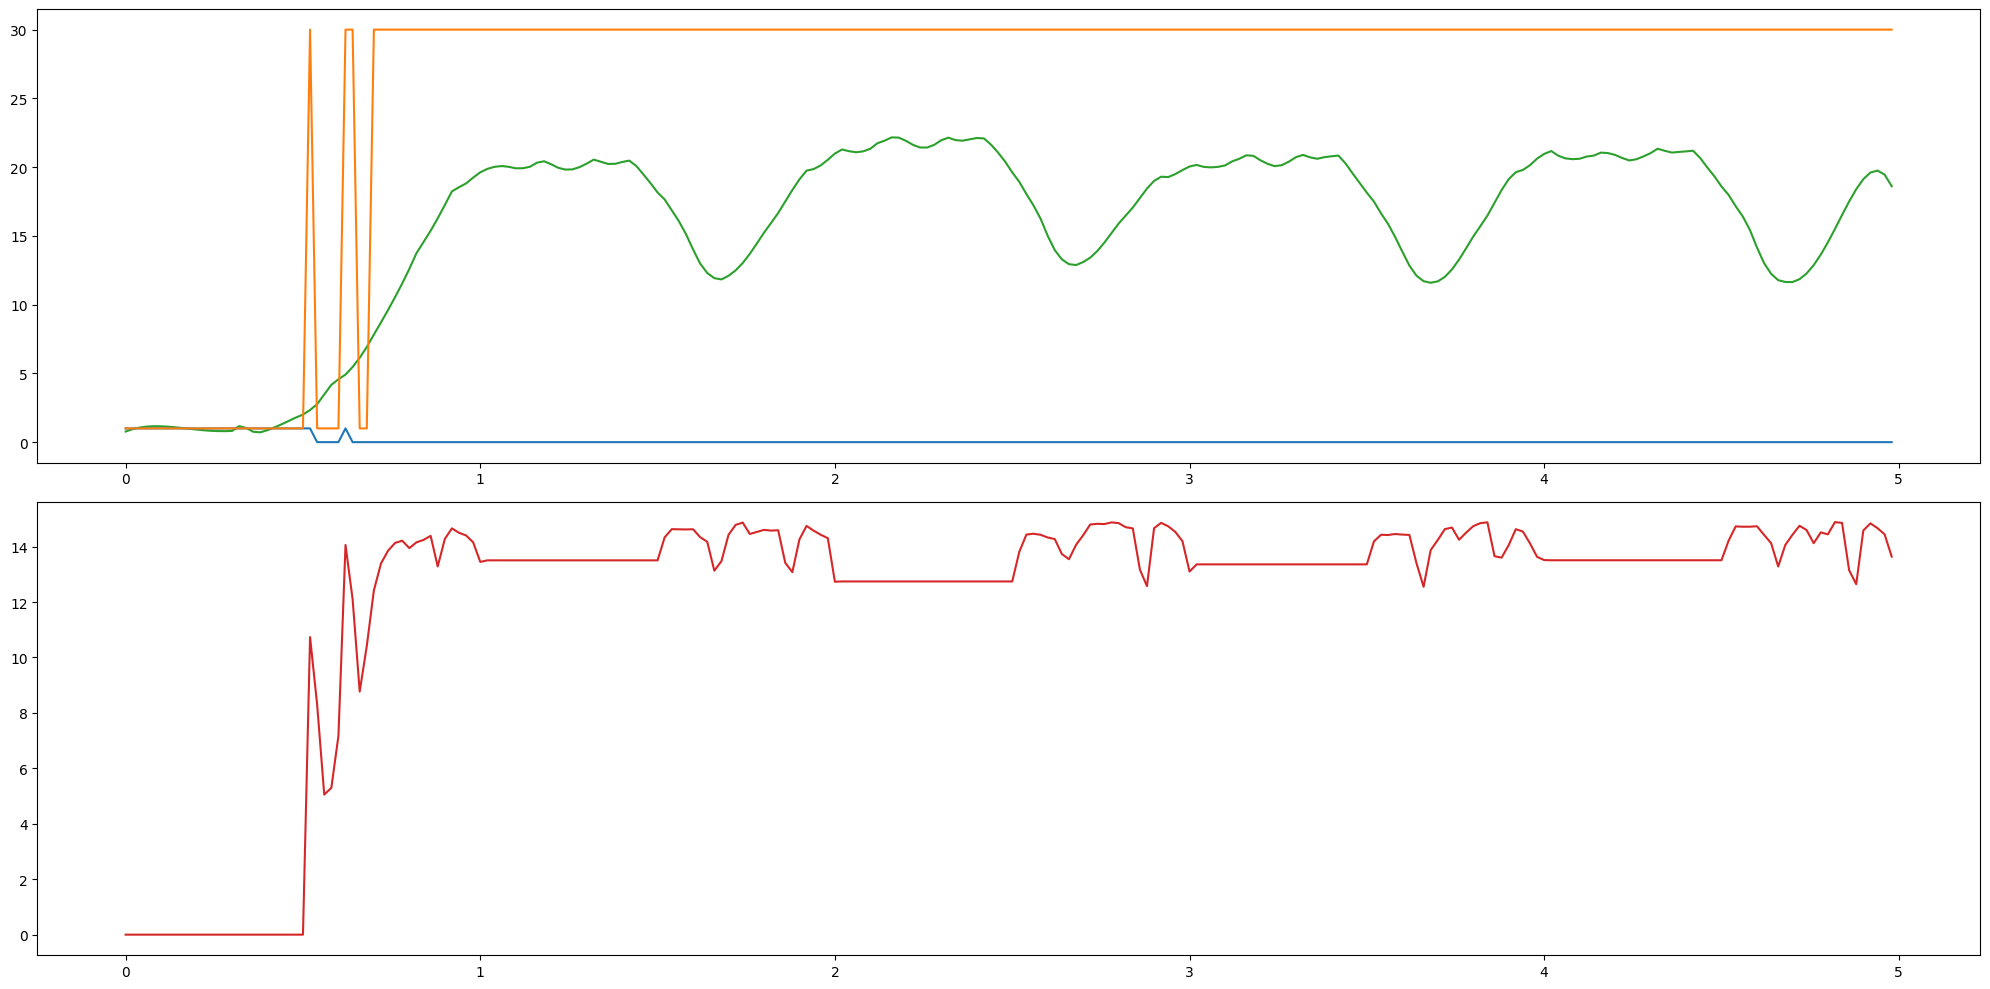

In [21]:
figure(figsize=(20, 10))
file_name = 'r_e_cut2rg_weigts.pickle'
file_rg2InE = 'r_e_rg2InE_weigts.pickle'

# 60
load_path_60 = load_path_prefix+str(dirs[0])+'/'
print (load_path_60)

with open(load_path_60 + file_name, 'rb') as f60:
    mon60 = pickle.load(f60)
    #subplot(411)
    #plot(mon60["t"], mon60['s'])
    #xlim([render_start/second, render_duration/second])
    
    ## avg
    avg_w = average(mon60['s'], axis=1)
    smoothed_avg_w = savgol_filter(avg_w, 31, 4)
    max_w = percentile(mon60['s'], 15, axis=1)
    min_w = percentile(mon60['s'], 85, axis=1)
    var_w = std(mon60['s'], axis=1)
    smoothed_var_w = savgol_filter(var_w, 31, 4)
    
    ## avg
    subplot(211)
    plot(mon60['t']/second, smoothed_avg_w, 'tab:green')
    plot(mon60['t']/second, max_w, 'tab:blue')
    plot(mon60['t']/second, min_w, 'tab:orange')
    #xlim([render_start/second, render_duration/second])
    tight_layout()
    
    subplot(212)
    plot(mon60['t']/second, var_w, 'tab:red')
    #xlim([render_start/second, render_duration/second])
    tight_layout()
    
    
show()

### Flexor

In [ ]:
figure(figsize=(20, 10))
file_name = 'r_f_muscle2rg_weigts.pickle'
file_rg2InE = 'r_f_rg2InE_weigts.pickle'

load_path_60 = load_path_prefix+str(dirs[0])+'/'
print (load_path_60)

with open(load_path_60 + file_name, 'rb') as f60:
    mon60 = pickle.load(f60)
    #subplot(411)
    #plot(mon60["t"], mon60['s'])
    #xlim([render_start/second, render_duration/second])
    
    ## avg
    avg_w = average(mon60['s'], axis=1)
    smoothed_avg_w = savgol_filter(avg_w, 21, 4)
    max_w = percentile(mon60['s'], 15, axis=1)
    min_w = percentile(mon60['s'], 85, axis=1)
    var_w = std(mon60['s'], axis=1)
    smoothed_var_w = savgol_filter(var_w, 21, 4)
    
    ## avg
    subplot(511)
    plot(mon60['t']/second, smoothed_avg_w, 'tab:green')
    plot(mon60['t']/second, max_w, 'tab:blue')
    plot(mon60['t']/second, min_w, 'tab:orange')
    tight_layout()
    
    subplot(512)
    plot(mon60['t']/second, smoothed_var_w, 'tab:red')
    tight_layout()
    
    with open(load_path_60 + file_rg2InE, 'rb') as frg2InE:
        rg2InE = pickle.load(frg2InE)
        
        avg_w_rg2InE = average(rg2InE['s'], axis=1)
        smoothed_avg_w_avg_w_rg2InE = savgol_filter(avg_w_rg2InE, 21, 4)
        max_w = percentile(rg2InE['s'], 15, axis=1)
        min_w = percentile(rg2InE['s'], 85, axis=1)
        ## avg
        subplot(513)
        plot(rg2InE['t']/second, smoothed_avg_w, 'tab:green')
        plot(rg2InE['t']/second, max_w, 'tab:blue')
        plot(rg2InE['t']/second, min_w, 'tab:orange')
        tight_layout()
    
    
show()

### F&E

In [ ]:
## draw all combined weights 
figure(figsize=(20, 15))

## ALL wheights 
file_name_e='r_e_cut2rg_weigts.pickle'
file_name_f='r_f_muscle2rg_weigts.pickle'
file_rg2InE = 'r_e_rg2InE_weigts.pickle'
file_rg2InF = 'r_f_rg2InE_weigts.pickle'

print(file_name)
for d in dirs:
    load_path_60 = load_path_prefix+str(d)+'/'
    print (load_path_60)

    with open(load_path_60 + file_name_e, 'rb') as f60:
        mon60 = pickle.load(f60)
        ## avg
        avg_w = average(mon60['s'], axis=1)
        max_w = percentile(mon60['s'], 90, axis=1)
        min_w = percentile(mon60['s'], 10, axis=1)
        smoothed_avg_w = savgol_filter(avg_w, 21, 4)
        var_w = std(mon60['s'], axis=1)
        smoothed_var_w = savgol_filter(var_w, 21, 4)
        
    with open(load_path_60 + file_name_f, 'rb') as f60f:
        mon60f = pickle.load(f60f)
        ## avg
        avg_wf = average(mon60f['s'], axis=1)
        max_wf = percentile(mon60f['s'], 90, axis=1)
        min_wf = percentile(mon60f['s'], 10, axis=1)
        smoothed_avg_wf = savgol_filter(avg_wf, 21, 4)
        var_wf = std(mon60f['s'], axis=1)
        smoothed_var_wf = savgol_filter(var_wf, 21, 4)
        
    with open(load_path_60 + file_rg2InE, 'rb') as f60:
        mon60 = pickle.load(f60)
        ## avg
        avg_wInE = average(mon60['s'], axis=1)
        max_wInE = percentile(mon60['s'], 90, axis=1)
        min_wInE = percentile(mon60['s'], 10, axis=1)
        smoothed_avg_wInE = savgol_filter(avg_w, 21, 4)
        var_wInE = std(mon60['s'], axis=1)
        smoothed_var_wInE = savgol_filter(var_w, 21, 4)
        
    with open(load_path_60 + file_rg2InF, 'rb') as f60f:
        mon60f = pickle.load(f60f)
        ## avg
        avg_wInF = average(mon60f['s'], axis=1)
        max_wInF = percentile(mon60f['s'], 90, axis=1)
        min_wInF = percentile(mon60f['s'], 10, axis=1)
        smoothed_avg_wInF = savgol_filter(avg_wf, 21, 4)
        var_wInF = std(mon60f['s'], axis=1)
        smoothed_var_wInF = savgol_filter(var_wf, 21, 4)
    
        # cut2rg
        subplot(411)
        plot(mon60['t']/second, smoothed_avg_w, 'tab:green')
        plot(mon60['t']/second, max_w, 'tab:orange')
        plot(mon60['t']/second, min_w, 'tab:blue')
        plot(mon60['t']/second, smoothed_avg_wf, 'tab:cyan')
        plot(mon60['t']/second, max_wf, 'tab:olive')
        plot(mon60['t']/second, min_wf, 'tab:purple')
        tight_layout()
        
        # rg2InX
        subplot(412)
        plot(mon60['t']/second, smoothed_avg_wInE, 'tab:green')
        plot(mon60['t']/second, max_wInE, 'tab:orange')
        plot(mon60['t']/second, min_wInE, 'tab:blue')
        plot(mon60['t']/second, smoothed_avg_wInF, 'tab:cyan')
        plot(mon60['t']/second, max_wInF, 'tab:olive')
        plot(mon60['t']/second, min_wInF, 'tab:purple')
        tight_layout()

show()
